<a href="https://colab.research.google.com/github/tercasaskova311/Crosslinguistics_emotional_expression/blob/main/Final_code_hackathon_cogni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib as plt
import googledrivedownloader as gdd

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
csv_1 = pd.read_csv('/content/df_emotions_full_ds-2.csv')
csv_2 = pd.read_csv('/content/df_emotions_full_ds.csv')
csv_3 = pd.read_csv('/content/df_emotions_full_ds_3.csv')
csv_4 = pd.read_csv('/content/df_emotions_full_ds_reduced.csv')

In [ ]:
#concat all csv files
emotion_scores_all_files = pd.concat([csv_1, csv_2, csv_3, csv_4]) #in the end we have very solid sample..
emotion_scores_all_files.describe()



,Unnamed: 0,eng_anger,eng_joy,eng_trust,eng_sadness,eng_disgust,eng_fear,eng_anticipation,eng_surprise,it_anger,it_joy,it_trust,it_sadness,it_disgust,it_fear,it_anticipation,it_surprise
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,84.363636,-1.221168,0.553322,2.666958,-1.071414,-1.526332,-0.866449,1.208103,-0.446363,-1.147624,0.331354,2.061073,-0.689304,-1.255542,-0.873430,1.042968,-0.193328
std,59.479792,1.006025,1.238982,1.263254,0.981992,0.802270,1.146163,1.164794,0.830018,1.041815,1.231357,1.433645,0.939629,0.886163,1.043525,1.115046,0.932024
min,0.000000,-3.249282,-2.113748,-1.046658,-3.223727,-3.468104,-4.037823,-1.704263,-2.186519,-3.788661,-2.941183,-1.160692,-2.924427,-3.546509,-3.558953,-1.856715,-2.612826
25%,34.000000,-1.849422,-0.290103,1.845270,-1.769783,-2.050272,-1.753096,0.340274,-1.109774,-1.953054,-0.430706,1.049376,-1.484554,-1.971650,-1.634910,0.034843,-0.811818
50%,68.500000,-1.371332,0.458602,2.631863,-1.108387,-1.654757,-0.971790,1.205093,-0.506983,-1.237007,0.051127,2.052934,-0.712689,-1.390514,-0.888338,0.977972,-0.151230
75%,134.750000,-0.723028,1.368077,3.483481,-0.475598,-1.125869,-0.167448,2.002156,0.000000,-0.237677,1.043271,3.032320,0.000000,-0.591495,0.000000,1.777118,0.214372
max,206.000000,3.114351,3.960373,6.975394,3.474308,2.000000,3.669415,4.858879,2.961708,3.657076,4.653142,5.962930,2.198920,2.000000,2.274102,4.740272,3.647508


In [ ]:
#cleaning data

emotion_scores_all_files.reset_index(drop=True, inplace=True)

emotion_scores_all_files.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

emotion_scores_all_files.to_csv('emotion_scores_all_files.csv')


In [ ]:
english_columns = [col for col in emotion_scores_all_files.columns if col.startswith("eng_")]
italian_columns = [col for col in emotion_scores_all_files.columns if col.startswith("it_")]

# Create separate DataFrames for English and Italian emotions
df_english = emotion_scores_all_files[["id"] + english_columns]  # Assuming there's an 'id' column, adjust if needed
df_italian = emotion_scores_all_files[["id"] + italian_columns]  # Assuming there's an 'id' column, adjust if needed

#drop id so it does not skewed the plot
df_english.drop(columns='id', errors='ignore', inplace=True)
df_italian.drop(columns='id', errors='ignore', inplace=True)

<ipython-input-10-65f477c92ea6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english.drop(columns='id', errors='ignore', inplace=True)
<ipython-input-10-65f477c92ea6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italian.drop(columns='id', errors='ignore', inplace=True)


In [ ]:
df_it_sum = df_italian.sum()
df_eng_sum = df_english.sum()

sum_all_emotion_scores = pd.DataFrame({
    'Italian': df_it_sum,
    'English': df_eng_sum
})


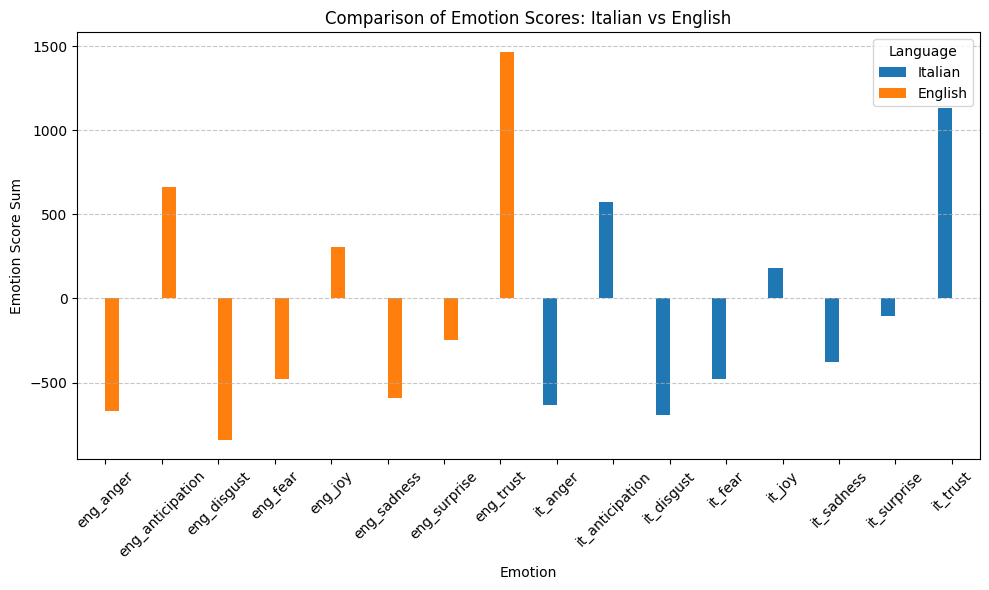

In [ ]:
import matplotlib.pyplot as plt

sum_all_emotion_scores.plot(kind='bar', figsize=(10, 6))

plt.title("Comparison of Emotion Scores: Italian vs English")
plt.ylabel("Emotion Score Sum")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Language")
plt.tight_layout()
plt.show()

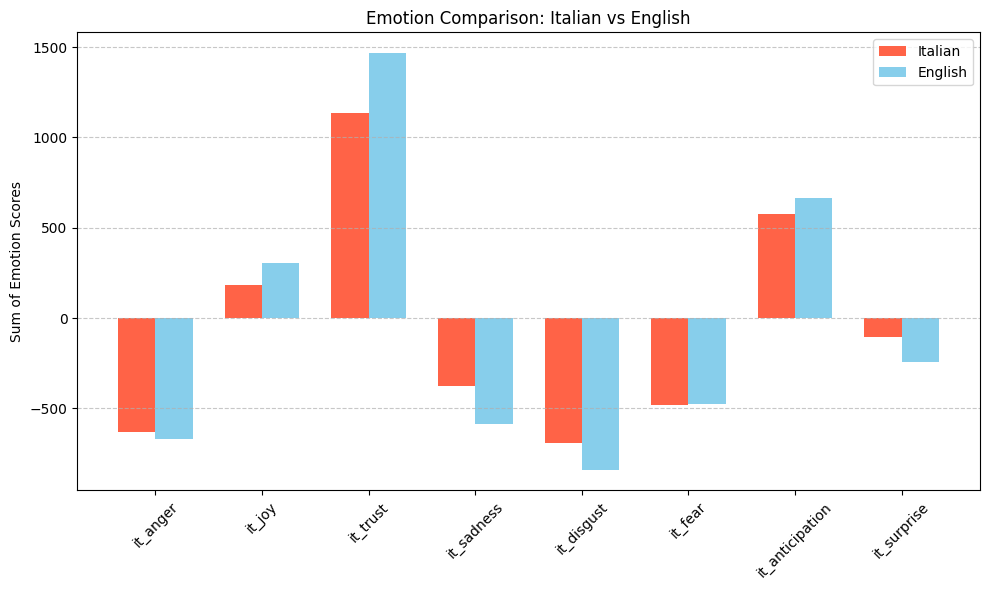

In [ ]:
import numpy as np

labels = df_it_sum.index  # emotion names
x = np.arange(len(labels))  # label locations

width = 0.35  # width of the bars

# 3. Plot
fig, ax = plt.subplots(figsize=(10, 6))  # Correct figure creation
bars1 = ax.bar(x - width/2, df_it_sum.values, width, label='Italian', color='tomato')
bars2 = ax.bar(x + width/2, df_eng_sum.values, width, label='English', color='skyblue')

# 4. Aesthetics
ax.set_ylabel('Sum of Emotion Scores')
ax.set_title('Emotion Comparison: Italian vs English')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


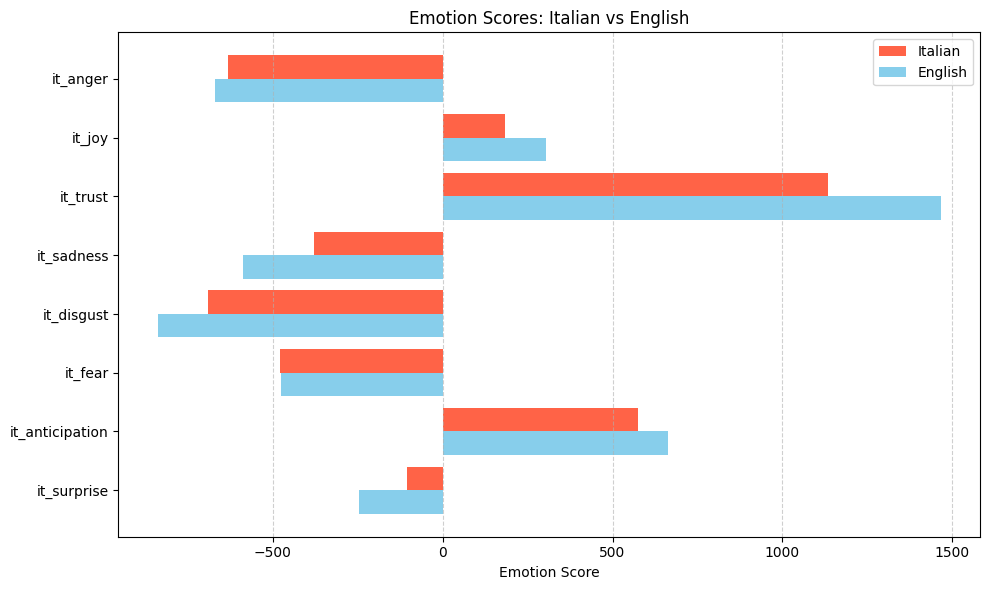

In [ ]:
# Prepare data
labels = df_it_sum.index.tolist()
italian = df_it_sum.values
english = df_eng_sum.values

x = np.arange(len(labels))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(x - 0.2, italian, height=0.4, label='Italian', color='tomato')
ax.barh(x + 0.2, english, height=0.4, label='English', color='skyblue')

# Aesthetics
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # Highest values at top
ax.set_xlabel('Emotion Score')
ax.set_title('Emotion Scores: Italian vs English')
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


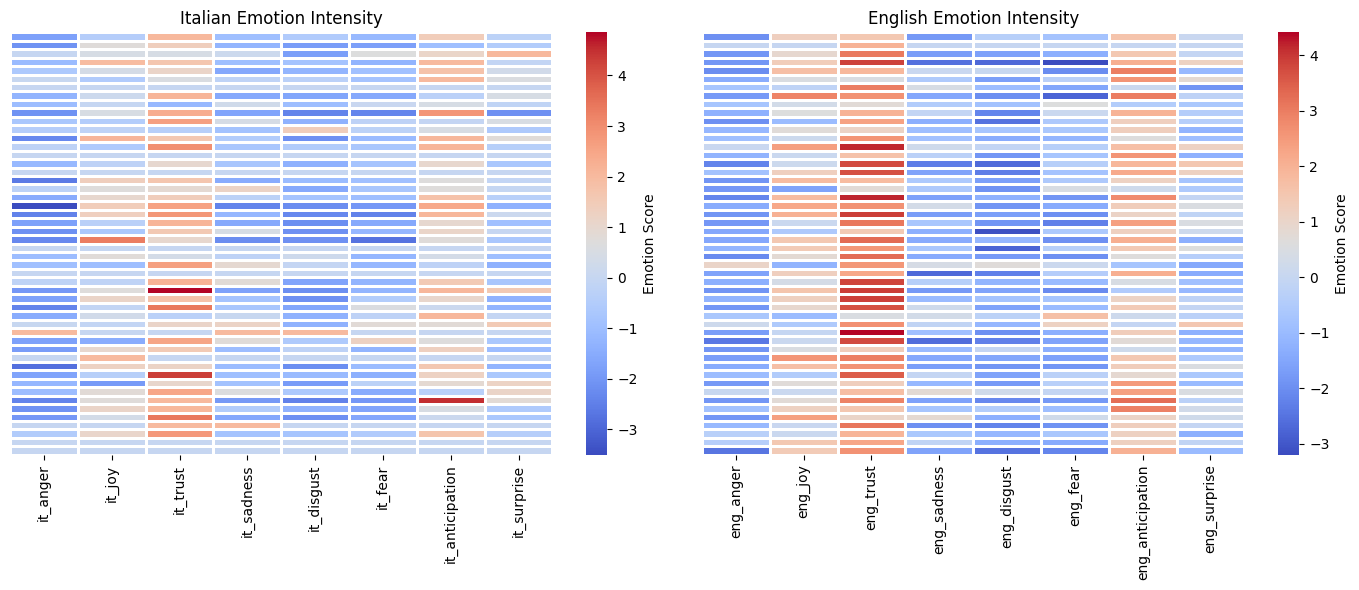

In [ ]:
# Limit the number of samples (e.g., select a random 50 rows for visualization)
df_english_sampled = df_english.sample(n=50, random_state=42)  # Randomly sample 50 rows
df_italian_sampled = df_italian.sample(n=50, random_state=42)  # Randomly sample 50 rows

# Create two subplots for Italian and English emotions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Italian emotions
sns.heatmap(df_italian_sampled, ax=ax1, cmap='coolwarm', annot=False, fmt=".2f", linewidths=1, cbar_kws={'label': 'Emotion Score'}, yticklabels= False)
ax1.set_title("Italian Emotion Intensity")

# Plot for English emotions
sns.heatmap(df_english_sampled, ax=ax2, cmap='coolwarm', annot=False, fmt=".2f", linewidths=1, cbar_kws={'label': 'Emotion Score'}, yticklabels= False)
ax2.set_title("English Emotion Intensity")

plt.tight_layout()
plt.show()
